In [1]:
%pylab inline
import uproot
import awkward as ak
import sys
sys.path.append("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/Preselection/plots_and_tables/")
import plotter
import pandas as pd
import mplhep
plt.style.use(mplhep.style.CMS)
from yahist import Hist1D, Hist2D

Populating the interactive namespace from numpy and matplotlib


In [2]:
#tau_flat_df = pd.read_pickle("/nfs-7/userdata/bsathian/singleH_extended_mass_take2_with_DNN_mass_with_cov.pkl")
tau_flat_df = pd.read_pickle("/nfs-7/userdata/bsathian/singleH_extended_mass_take2_with_DNN_mass_with_cov_and_jets_MAE_network.pkl")

In [4]:
import json
with open("../MVAs/output/singleH_extended_mass_DNN_train_and_valid_unweighted_lambda_0_200_neurons_4_layers_batch_size_1024_extended_dataset_true_mass_normalized_scaled_reduced_features_with_cov_and_jet_info_MAE_loss_lr_5eminus9/singleH_extended_mass_DNN_train_and_valid_unweighted_lambda_0_200_neurons_4_layers_batch_size_1024_extended_dataset_true_mass_normalized_scaled_reduced_features_with_cov_and_jet_info_MAE_loss_lr_5eminus9_metadata.json", "r") as f:
    training_options =  json.load(f)

In [5]:
training_options

{'config': {'mva': {'model_file': 'singleH_extended_mass_DNN_train_and_valid_unweighted_lambda_0_200_neurons_4_layers_batch_size_1024_extended_dataset_true_mass_normalized_scaled_reduced_features_with_cov_and_jet_info_MAE_loss_lr_5eminus9',
   'training_features': ['decay_1_pt',
    'decay_1_eta',
    'decay_1_phi',
    'decay_1_mass',
    'decay_2_pt',
    'decay_2_eta',
    'decay_2_phi',
    'decay_2_mass',
    'Category_onehot_1',
    'Category_onehot_2',
    'Category_onehot_3',
    'Category_onehot_4',
    'Category_onehot_5',
    'MET_pt',
    'MET_phi',
    'MET_covXX',
    'MET_covXY',
    'MET_covYY',
    'jet1_pt',
    'jet1_eta',
    'jet1_phi',
    'jet2_pt',
    'jet2_eta',
    'jet2_phi',
    'n_good_jets'],
   'type': 'regression_neural_network'}}}

In [6]:
[i for i in training_options["config"]["mva"]["training_features"] if "pt" in i or "mass" in i or "cov" in i]

['decay_1_pt',
 'decay_1_mass',
 'decay_2_pt',
 'decay_2_mass',
 'MET_pt',
 'MET_covXX',
 'MET_covXY',
 'MET_covYY',
 'jet1_pt',
 'jet2_pt']

In [7]:
tau_flat_df.loc[tau_flat_df["train_label"] == 2, ["mva_score", "gen_higgs_mass"]]
tau_flat_df["nn_ditau_mass"] = tau_flat_df["mva_score"] * tau_flat_df["m_tautau_vis"]

Text(0.5, 1.0, 'Gen Higgs mass distributions after Pre-selection')

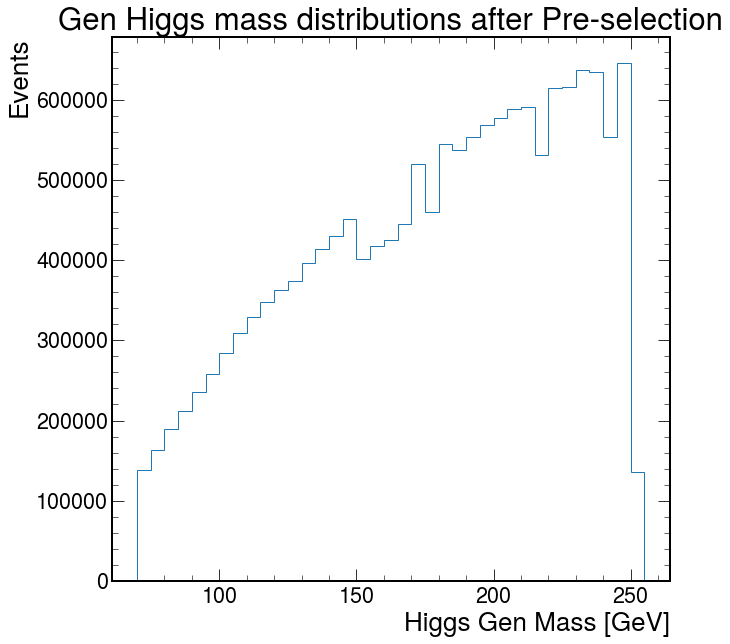

In [8]:
Hist1D(tau_flat_df["gen_higgs_mass"], bins = arange(70, 260, 5)).plot()
plt.xlabel("Higgs Gen Mass [GeV]")
plt.ylabel("Events")
plt.title("Gen Higgs mass distributions after Pre-selection")
#plt.savefig("gen_higgs_after_preselection.pdf")

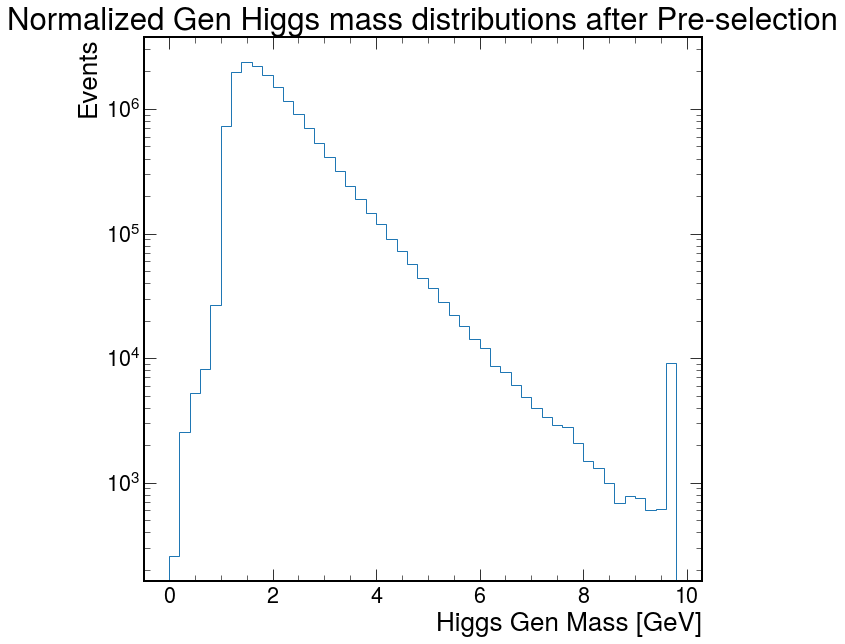

In [9]:
Hist1D(tau_flat_df["gen_higgs_mass_normalized"], bins = arange(0,10, 0.2)).plot()
plt.xlabel("Higgs Gen Mass [GeV]")
plt.ylabel("Events")
plt.title("Normalized Gen Higgs mass distributions after Pre-selection")
plt.yscale("log")
#plt.savefig("gen_higgs_after_preselection.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


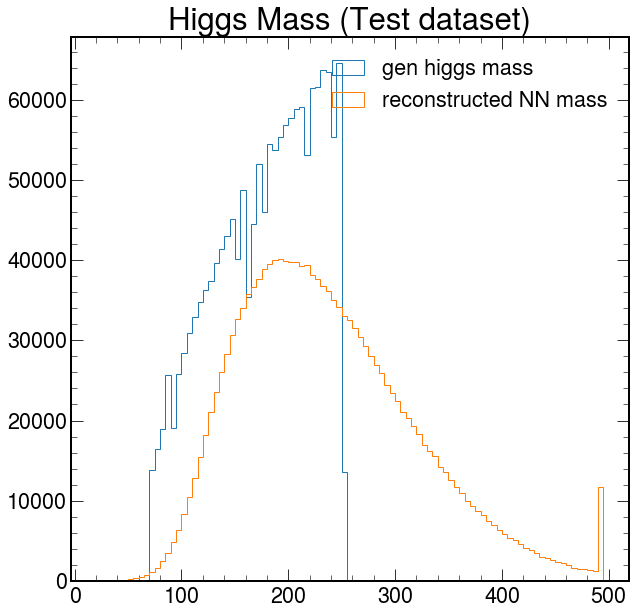

In [10]:
plt.subplots(1,1)
gen_hist_test = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].values, bins = np.arange(20, 500, 5), overflow=False)
nn_hist_test = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "nn_ditau_mass"].values, bins = np.arange(20, 500, 5))
gen_hist_test.plot(label = "gen higgs mass")
nn_hist_test.plot(label = "reconstructed NN mass")
plt.title("Higgs Mass (Test dataset)")
plt.savefig("singleH_validation_10_layers_500_neurons_scaled_dataset_reduced_features.pdf")

In [11]:
tau_flat_df.loc[tau_flat_df["nn_ditau_mass"] == tau_flat_df["nn_ditau_mass"].max(), ["m_tautau_vis", "nn_ditau_mass", "gen_higgs_mass", "gen_higgs_mass_normalized", "mva_score"]]

,m_tautau_vis,nn_ditau_mass,gen_higgs_mass,gen_higgs_mass_normalized,mva_score
15595753,0.008282,102996.775636,71.0,8572.46025,12435715.0


(<matplotlib.image.AxesImage at 0x7f290b286b90>,
 <AxesSubplot:xlabel='gen_higgs_mass', ylabel='gen_higgs_mass_normalized'>)

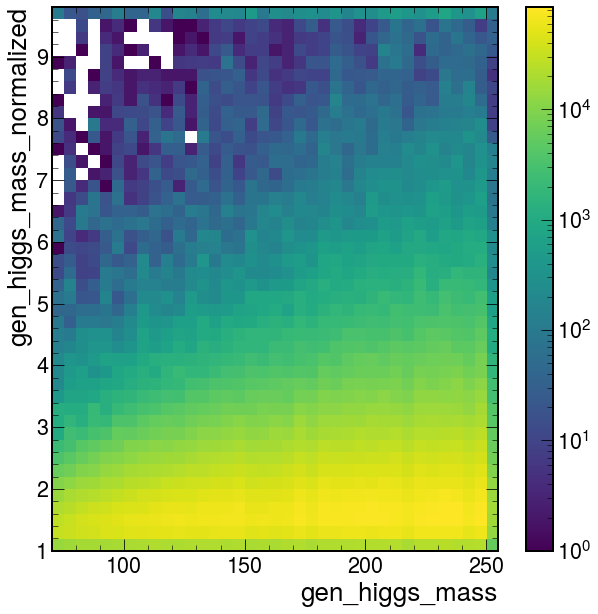

In [12]:
Hist2D(tau_flat_df[["gen_higgs_mass", "gen_higgs_mass_normalized"]], bins = (arange(70,260,5), arange(1.0,10,0.2))).plot(norm=mpl.colors.LogNorm())

Text(0.5, 1.0, 'Higgs Mass (Train dataset)')

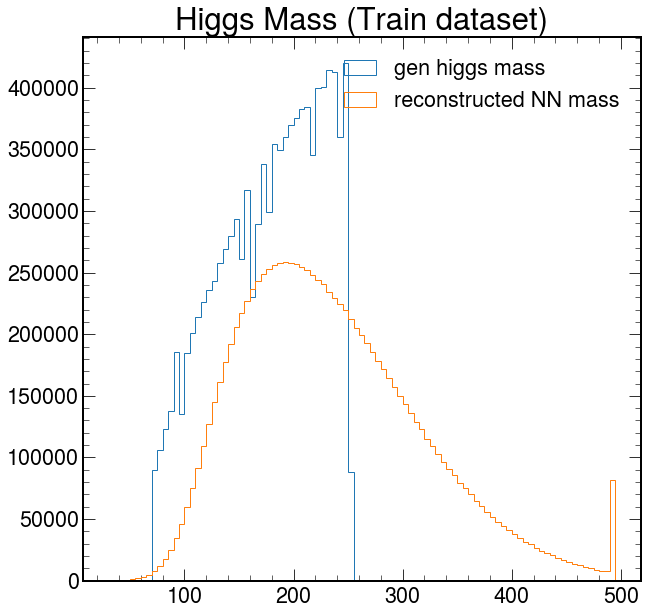

In [13]:
plt.subplots(1,1)

gen_hist_train = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 0, "gen_higgs_mass"].values, bins = np.arange(30, 500, 5))
nn_hist_train = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 0, "nn_ditau_mass"].values, bins = np.arange(30, 500, 5))
gen_hist_train.plot(label = "gen higgs mass")
nn_hist_train.plot(label = "reconstructed NN mass")
plt.title("Higgs Mass (Train dataset)")
#plt.savefig("singleH_train_10_layers_500_neurons_scaled_dataset_reduced_features.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


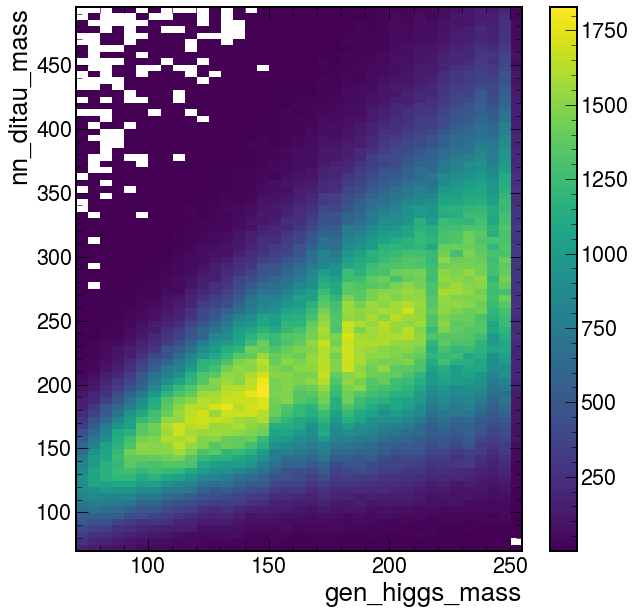

In [14]:
correlation_hist_test = Hist2D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, ["gen_higgs_mass", "nn_ditau_mass"]], bins=(arange(70, 260, 5), arange(70, 500, 5)), overflow=False)
correlation_hist_test.plot()
plt.savefig("singleH_correlation_10_layers_500_neurons_scaled_dataset_reduced_features.pdf")

In [15]:
bias = {}
resolution = {}
test_df = tau_flat_df.loc[tau_flat_df["train_label"] == 2]
for mass in tau_flat_df["gen_higgs_mass"].unique():
    temp = test_df[test_df["gen_higgs_mass"] == mass]
    bias[mass] = temp["nn_ditau_mass"].mean() - mass
    resolution[mass] = temp["nn_ditau_mass"].std()/temp["nn_ditau_mass"].mean()

In [16]:
tau_flat_df.loc[(tau_flat_df["train_label"] == 2) & (tau_flat_df["gen_higgs_mass"] == 125), "nn_ditau_mass"].mean()

185.64520759523236

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


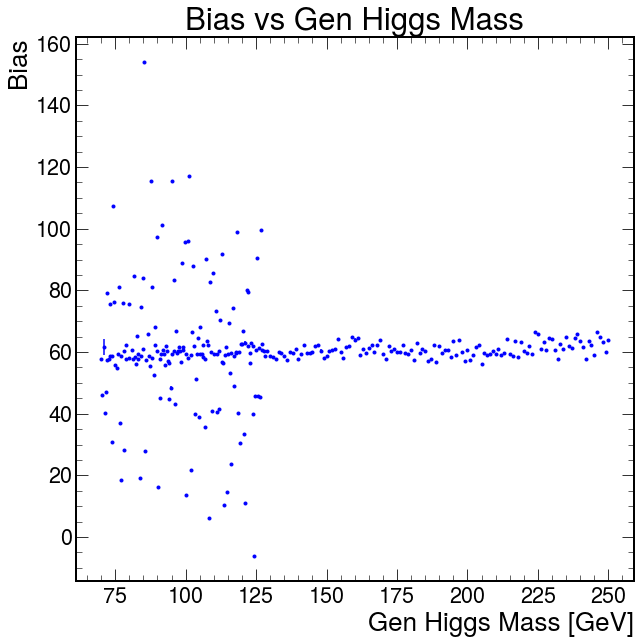

In [17]:
plt.errorbar(x=bias.keys(), y=bias.values(), yerr=resolution.values(), fmt="b.")
plt.xlabel("Gen Higgs Mass [GeV]")
plt.ylabel("Bias")
plt.title("Bias vs Gen Higgs Mass")
plt.savefig("bias_10_layers_500_neurons.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


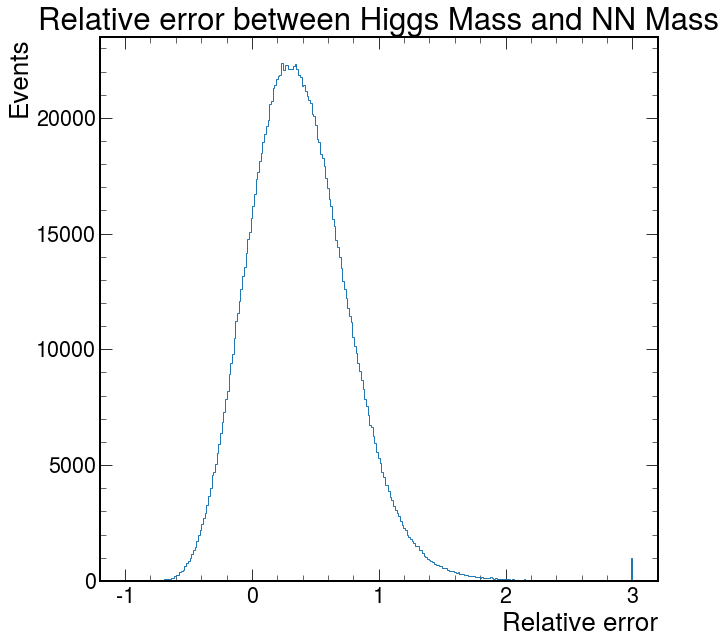

In [18]:
tempDF= tau_flat_df.loc[tau_flat_df["train_label"] == 2, ["gen_higgs_mass", "nn_ditau_mass"]]
residual_hist = Hist1D((tempDF["nn_ditau_mass"] - tempDF["gen_higgs_mass"])/tempDF["gen_higgs_mass"], bins = linspace(-1,3,300))
residual_hist.plot()
plt.xlabel("Relative error")
plt.ylabel("Events")
plt.title("Relative error between Higgs Mass and NN Mass")
plt.savefig("relative_error_gen_nn_10_layers_500_neurons.pdf")

In [19]:
residual_hist.std(), residual_hist.mean()

(0.39284139155360204, 0.3739192642078614)

In [20]:
# re-compute the train, val and test weights


train_df = tau_flat_df.loc[tau_flat_df["train_label"] == 0].copy()
val_df = tau_flat_df.loc[tau_flat_df["train_label"] == 1].copy()

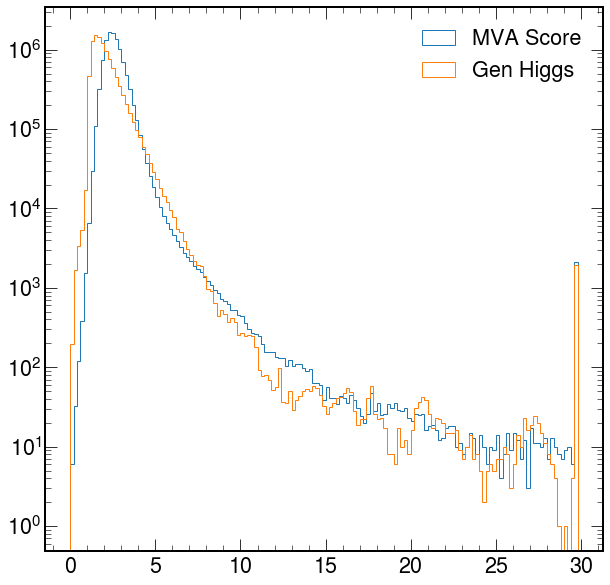

In [21]:
Hist1D(train_df["mva_score"], bins=arange(0,30, 0.2), label="MVA Score").plot()
Hist1D(train_df["gen_higgs_mass_normalized"], bins=arange(0,30, 0.2), label="Gen Higgs").plot()
plt.yscale("log")

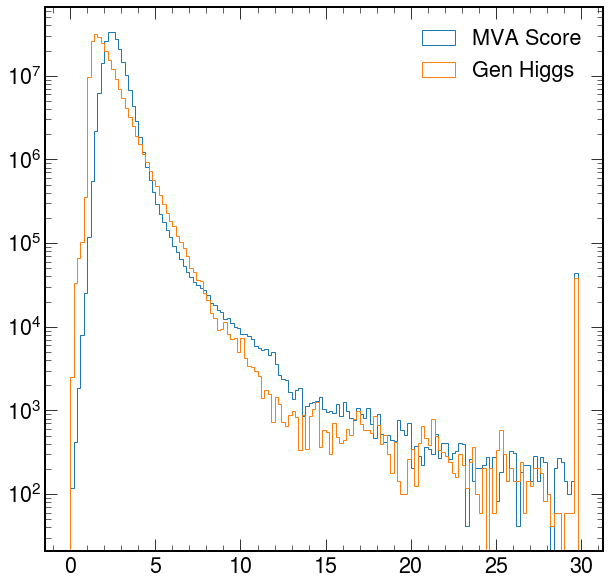

In [22]:
Hist1D(val_df["mva_score"], weights=val_df["weight"], bins=arange(0,30, 0.2), label="MVA Score").plot()
Hist1D(val_df["gen_higgs_mass_normalized"], weights=val_df["weight"], bins=arange(0,30, 0.2), label="Gen Higgs").plot()
plt.yscale("log")

### Checking if the distributions between train and test datasets are the same (i.e., statistical learning criterion)

In [23]:
train_ditau_mass_hist = Hist1D(train_df["m_tautau_vis"], weights=train_df["weight"], bins=np.arange(30,300,5))
val_ditau_mass_hist = Hist1D(val_df["m_tautau_vis"], weights=val_df["weight"], bins=np.arange(30,300,5))

<AxesSubplot:>

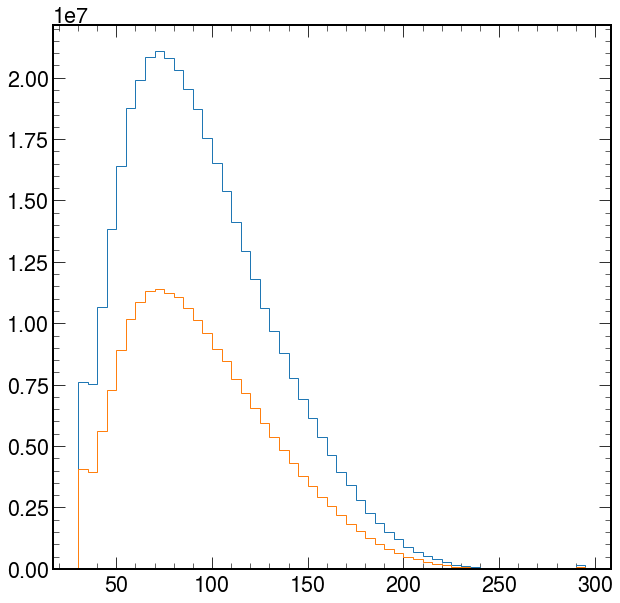

In [24]:
train_ditau_mass_hist.plot()
val_ditau_mass_hist.plot()

In [25]:
train_norm_target_hist = Hist1D(train_df["gen_higgs_mass_normalized"], weights=train_df["weight"], bins=np.arange(0,10,0.2))
val_norm_target_hist = Hist1D(val_df["gen_higgs_mass_normalized"], weights=val_df["weight"], bins=np.arange(0,10,0.2))

<AxesSubplot:>

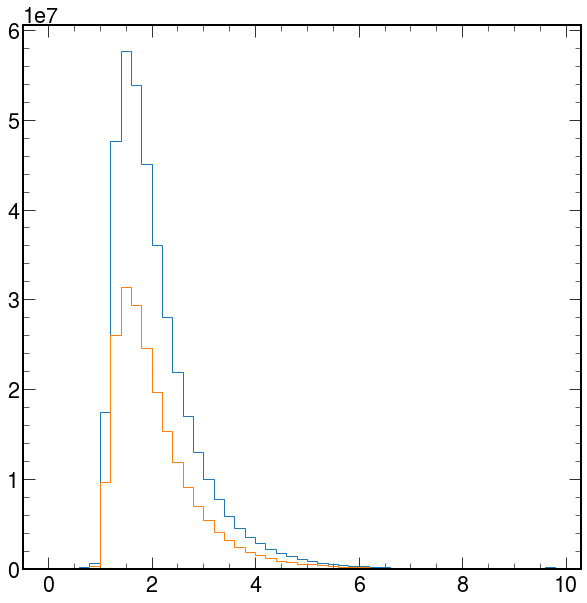

In [26]:
train_norm_target_hist.plot()
val_norm_target_hist.plot()

In [27]:
train_norm_target_hist = Hist1D(train_df["gen_higgs_mass_normalized"], bins=np.arange(0,10,0.2))
val_norm_target_hist = Hist1D(val_df["gen_higgs_mass_normalized"], bins=np.arange(0,10,0.2))

<AxesSubplot:>

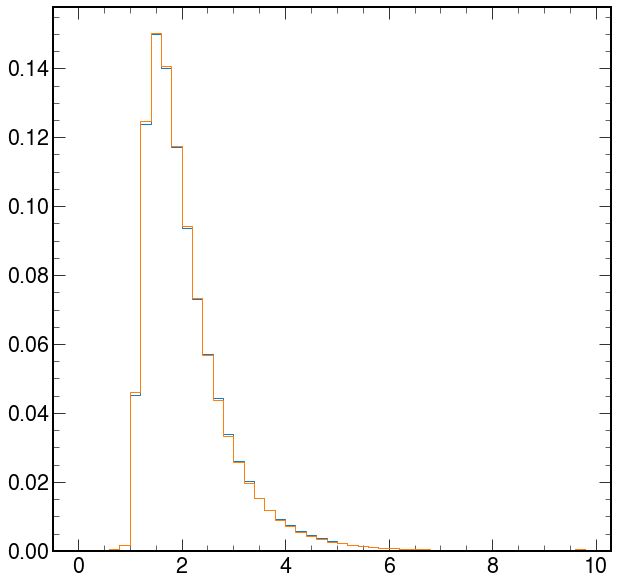

In [28]:
train_norm_target_hist /= train_norm_target_hist.integral
val_norm_target_hist /= val_norm_target_hist.integral
train_norm_target_hist.plot()
val_norm_target_hist.plot()

### Use this distribution to assign weights

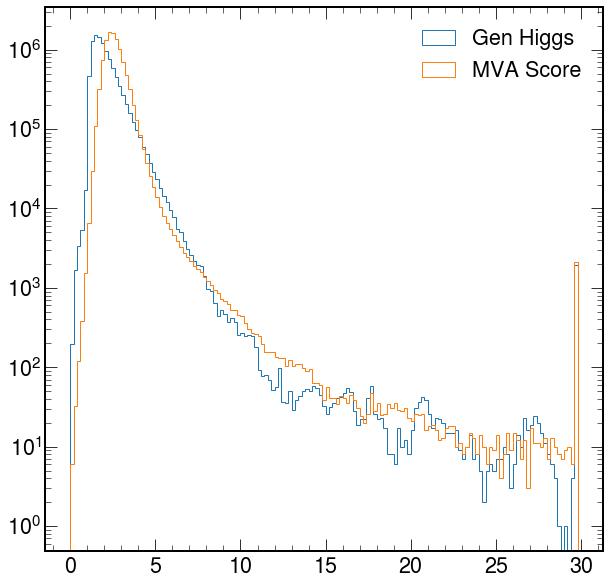

In [29]:
Hist1D(train_df["gen_higgs_mass_normalized"], bins=arange(0,30, 0.2), label="Gen Higgs").plot()
Hist1D(train_df["mva_score"], bins=arange(0,30, 0.2), label="MVA Score").plot()
plt.yscale("log")

### HH and VH 

In [31]:
HH_df = pd.read_pickle("../Preselection/output/HHggTauTau_InclusivePresel_genZDecay_20210705_with_jet_info.pkl")
normalizable_columns = [i for i in training_options["config"]["mva"]["training_features"] if "pt" in i or "mass" in i or "cov" in i]
HH_df.loc[HH_df["m_tautau_vis"] == 0, "m_tautau_vis"] = 1e-7
for column in normalizable_columns:
    if "cov" not in column:
        HH_df[column] /= HH_df["m_tautau_vis"]
    else:
        HH_df[column] /= (HH_df["m_tautau_vis"] ** 2)
    


In [32]:
normalizable_columns

['decay_1_pt',
 'decay_1_mass',
 'decay_2_pt',
 'decay_2_mass',
 'MET_pt',
 'MET_covXX',
 'MET_covXY',
 'MET_covYY']

In [35]:
HH_df.to_pickle("/nfs-7/userdata/bsathian/HHggTauTau_InclusivePresel_genZDecay_20210705_with_jet_info_and_mva_scores.pkl")

In [41]:
signal_df = pd.read_pickle("/nfs-7/userdata/bsathian/HHggTauTau_InclusivePresel_genZDecay_20210705_with_jet_info_and_mva_scores.pkl")
signal_df["nn_ditau_mass"] = signal_df["mva_score"] * signal_df["m_tautau_vis"]


In [42]:
vh_df = signal_df.loc[(signal_df["process_id"] == 9) & (signal_df["Category_pairsLoose"] > -1)]
hh_df = signal_df.loc[(signal_df["process_id"] == -1) & (signal_df["Category_pairsLoose"] > -1)]

In [43]:
hh_df.columns

Index(['gg_mass', 'nJet', 'MET_pt', 'MET_phi', 'MET_covXX', 'MET_covXY',
       'MET_covYY', 'diphoton_pt_mgg', 'diphoton_rapidity', 'diphoton_delta_R',
       'lead_pho_ptmgg', 'sublead_pho_ptmgg', 'lead_pho_eta',
       'sublead_pho_eta', 'lead_pho_idmva', 'sublead_pho_idmva',
       'lead_pho_phi', 'sublead_pho_phi', 'ele1_pt', 'ele1_eta', 'ele1_phi',
       'ele2_pt', 'ele2_eta', 'ele2_phi', 'ele1_tightId', 'ele2_tightId',
       'muon1_pt', 'muon1_eta', 'muon1_phi', 'muon2_pt', 'muon2_eta',
       'muon2_phi', 'muon1_tightId', 'muon2_tightId', 'tau1_pt', 'tau1_eta',
       'tau1_phi', 'tau2_pt', 'tau2_eta', 'tau2_phi', 'tau1_id_vs_e',
       'tau1_id_vs_m', 'tau1_id_vs_j', 'tau2_id_vs_e', 'tau2_id_vs_m',
       'tau2_id_vs_j', 'n_tau', 'n_electrons', 'n_muons', 'n_good_jets',
       'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_id', 'jet1_bTagDeepFlavB',
       'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_id', 'jet2_bTagDeepFlavB',
       'pt_tautauSVFitLoose', 'eta_tautauSVFitLoose', 'phi

In [44]:
hh_df["nn_ditau_mass"]

0         133.293072
3         143.661823
6         211.521290
8         220.448733
9         124.145156
             ...    
807651    116.733216
807653    173.390281
807657    165.734729
807658    178.665792
807660    183.069409
Name: nn_ditau_mass, Length: 318163, dtype: float64

In [45]:
vh_hist = Hist1D(vh_df["nn_ditau_mass"], bins = arange(30, 500, 5))
hh_hist = Hist1D(hh_df["nn_ditau_mass"], bins = arange(30, 500, 5))

hh_svfit_hist = Hist1D(hh_df["m_tautauSVFitLoose"], bins = arange(30, 500, 5))
vh_svfit_hist = Hist1D(vh_df["m_tautauSVFitLoose"], bins = arange(30, 500, 5))

In [46]:
hh_hist /= hh_hist.integral
vh_hist /= vh_hist.integral

hh_svfit_hist /= hh_svfit_hist.integral
vh_svfit_hist /= vh_svfit_hist.integral

<AxesSubplot:>

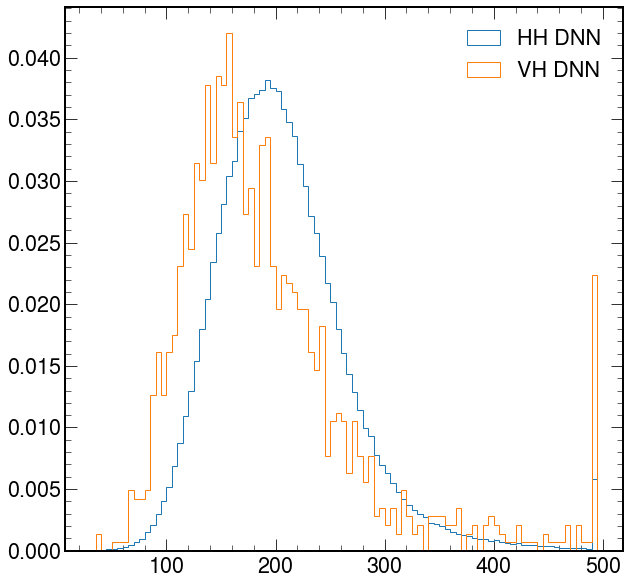

In [47]:
hh_hist.plot(label="HH DNN")
vh_hist.plot(label="VH DNN")
#plt.savefig("mass_distribution_10_layers_250_neurons_scaled_dataset_reduced_features.pdf")

In [48]:
vh_hist.mode(), vh_hist.mean(), vh_hist.std()

(157.5, 190.91497550734775, 83.5351483350852)

In [49]:
hh_hist.std(), hh_svfit_hist.std()

(62.03125098242854, 25.993188579431084)

<AxesSubplot:>

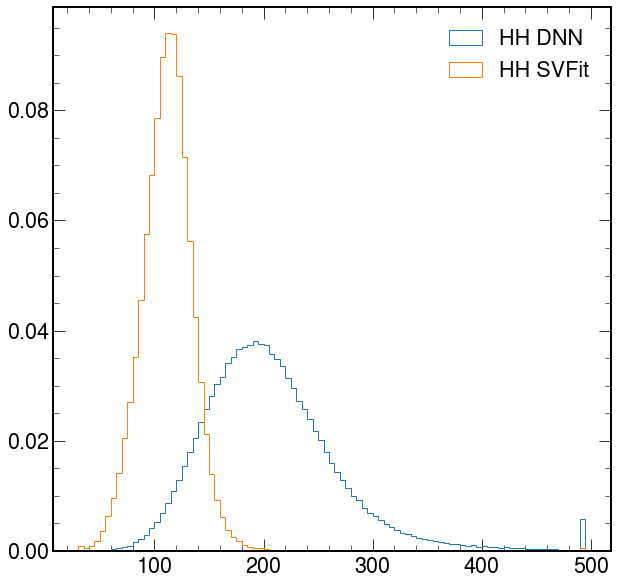

In [50]:
hh_hist.plot(label="HH DNN")
hh_svfit_hist.plot(label="HH SVFit")
#plt.savefig("hh_mass_comparison_10_layers_500_neurons.pdf")

In [52]:
hh_hist.mode() - 60

132.5

In [57]:
hh_hist.std(), hh_svfit_hist.std()

(62.03125098242854, 25.993188579431084)

<AxesSubplot:>

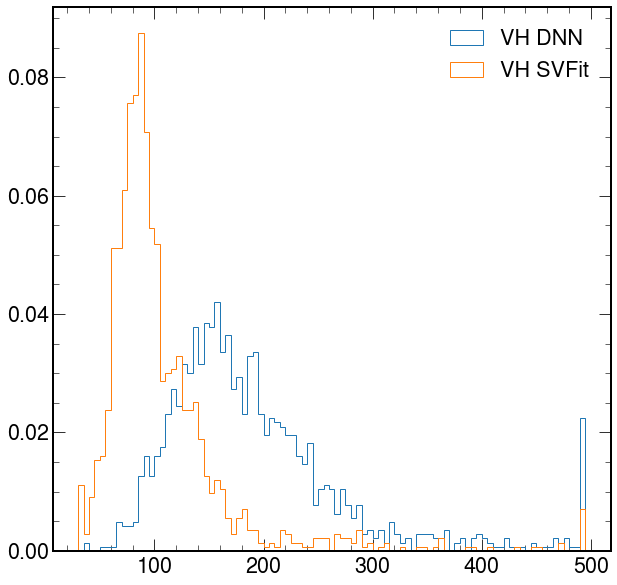

In [58]:
vh_hist.plot(label="VH DNN")
vh_svfit_hist.plot(label="VH SVFit")
#plt.savefig("vh_mass_comparison_10_layers_500_neurons.pdf")

In [59]:
hh_hist.std()

62.03125098242854

In [60]:
hh_svfit_hist.std()

25.993188579431084

In [61]:
vh_hist.std()/vh_hist.mean()

0.43755157558014707

In [62]:
vh_hist.mode(), hh_hist.mode()

(157.5, 192.5)

In [63]:
#val_loss = np.loadtxt("../MVAs/output/singleH_extended_mass_DNN_train_and_valid_weighted_lambda_0_500_neurons_10_layers_batch_size_1024_extended_dataset_true_mass_normalized_scaled_reduced_features_lr_1eminus8_with_cov/singleH_extended_mass_DNN_train_and_valid_weighted_lambda_0_500_neurons_10_layers_batch_size_1024_extended_dataset_true_mass_normalized_scaled_reduced_features_lr_1eminus8_with_cov_val_loss.txt")
#train_loss = np.loadtxt("../MVAs/output/singleH_extended_mass_DNN_train_and_valid_weighted_lambda_0_500_neurons_10_layers_batch_size_1024_extended_dataset_true_mass_normalized_scaled_reduced_features_lr_1eminus8_with_cov/singleH_extended_mass_DNN_train_and_valid_weighted_lambda_0_500_neurons_10_layers_batch_size_1024_extended_dataset_true_mass_normalized_scaled_reduced_features_lr_1eminus8_with_cov_train_loss.txt")

val_loss = np.loadtxt("../MVAs/output/singleH_extended_mass_DNN_train_and_valid_unweighted_lambda_0_200_neurons_4_layers_batch_size_1024_extended_dataset_true_mass_normalized_scaled_reduced_features_with_cov_and_jet_info_MAE_loss_lr_5eminus9/singleH_extended_mass_DNN_train_and_valid_unweighted_lambda_0_200_neurons_4_layers_batch_size_1024_extended_dataset_true_mass_normalized_scaled_reduced_features_with_cov_and_jet_info_MAE_loss_lr_5eminus9_val_loss.txt")
train_loss = np.loadtxt("../MVAs/output/singleH_extended_mass_DNN_train_and_valid_unweighted_lambda_0_200_neurons_4_layers_batch_size_1024_extended_dataset_true_mass_normalized_scaled_reduced_features_with_cov_and_jet_info_MAE_loss_lr_5eminus9/singleH_extended_mass_DNN_train_and_valid_unweighted_lambda_0_200_neurons_4_layers_batch_size_1024_extended_dataset_true_mass_normalized_scaled_reduced_features_with_cov_and_jet_info_MAE_loss_lr_5eminus9_train_loss.txt")

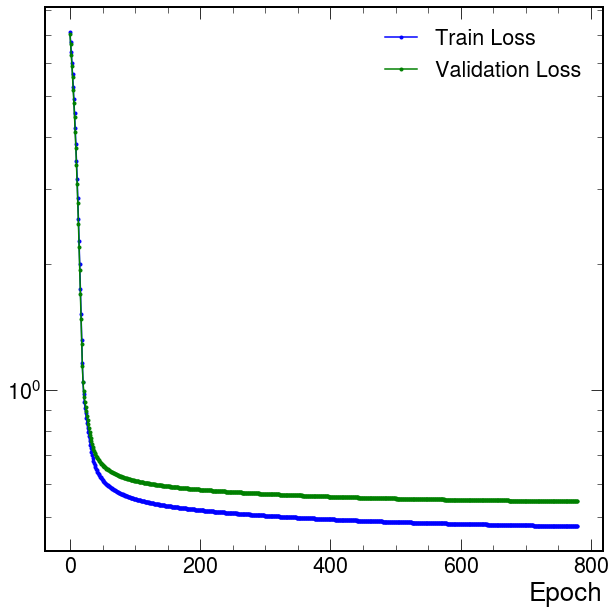

In [64]:
plt.plot(train_loss, "b.-", label="Train Loss")
plt.plot(val_loss, "g.-", label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.yscale("log")
#plt.savefig("loss_curve_4_layers_250_neurons_scaled_dataset_reduced_features.pdf")

In [65]:
val_loss.min(), val_loss.argmin()

(0.5452221632003784, 759)

In [66]:
hh_hist.mode()

192.5

<AxesSubplot:>

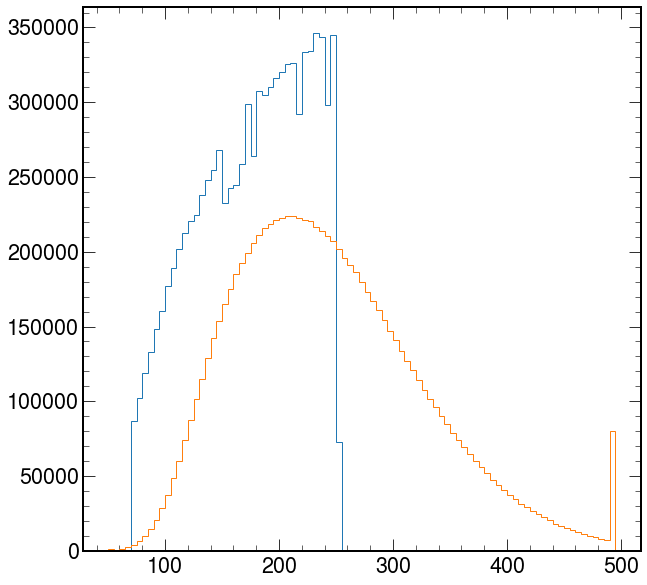

In [67]:
peak = train_df.loc[train_df["gen_higgs_mass_normalized"] < 3]

Hist1D(peak["gen_higgs_mass"], bins=arange(50,500,5)).plot()
Hist1D(peak["nn_ditau_mass"], bins=arange(50,500,5)).plot()

<AxesSubplot:>

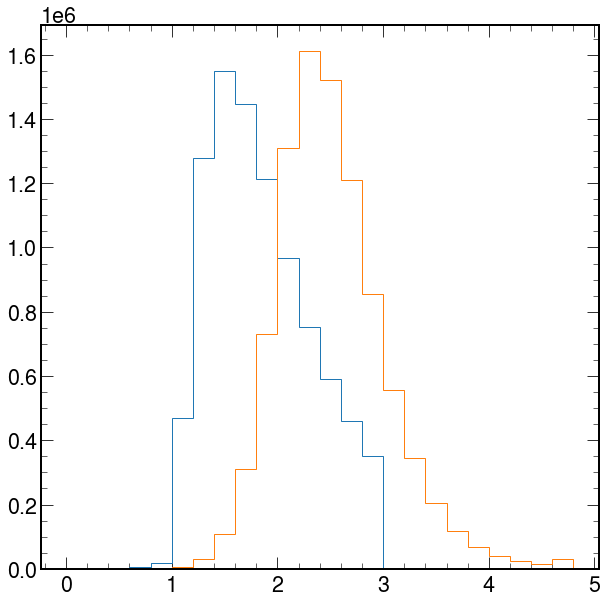

In [68]:
Hist1D(peak["gen_higgs_mass_normalized"],bins=arange(0,5,0.2)).plot()
Hist1D(peak["mva_score"], bins=arange(0,5,0.2)).plot()